# Cvičení

## NBA

Stáhni si dataset [nba_logreg.csv](nba_logreg.csv), který obsahuje informace o začínajících hráčích americké basketbalové ligy NBA. Jako vstupní proměnnou pro předpověď použij sloupec `TARGET_5Yrs`, který o daném hráči říká, zda byl aktivní v lize i po pěti letech.

Pokud by tě zajímal význam jednotlivých sloupců, pak je níže:

- GP (Games Played): odehrané hry,
- MIN (MinutesPlayed): odehrané minuty,
- PTS (PointsPerGame): body za hru,
- FGM (FieldGoalsMade): úspšné střelecké pokusy z pole,
- FGA (FieldGoalsAttempts): střelba z pole,
- FG% (FieldGoalsPercent): úspěšnost střelby z pole,
- 3P Made (3PointsMade): úspšné střelecké pokusy z tříbodového území,
- 3PA (3PointsAttempts): střelba z tříbodového území,
- 3G% (3PointPercent): úspěšnost střelby z tříbodového území,
- FTM (FreeGoalsMade): vhozené pokutové koše,
- FTA (FreeGoalsAttempts): trestné hody,
- FG% (FreeGoalsPercent): úspěšnost trestných hodů,
- OREB (OffensiveRebounds): útočné doskoky,
- DREB (DefensiveRebounds): obranné doskoky,
- REB (Rebounds): odrazy,
- AST (Assists): asistence,
- STL (Steals): zisky míče,
- TOV (Turnovers): ztráta.

Zdroje překladů: [Anglicko-český basketballový slovník](https://cbf.cz.basketball/upload/docs/391MGY.pdf)


In [20]:
import pandas
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    precision_score,
    recall_score,
    f1_score,
    accuracy_score,
)

In [21]:
data = pandas.read_csv("data/nba_logreg.csv")
data = data.drop(columns="Name")
data.head()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


- Načti si data do proměnných `X` a `y`


In [22]:
X = data.drop(columns=["TARGET_5Yrs"])
y = data["TARGET_5Yrs"]

- Rozděl data na trénovací a testovací (velikost testovacích dat nastav na 30% a nezapomeň nastavit proměnnou `random_state`, aby tvoje výsledky byly reprodukovatelné)


In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

- Pokud použijeme stejný algoritmus jako v prvním úkolu, tj. `KNeighborsClassifier`.


In [24]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

- Vytvoř si matici záměn a na základě poskytnutých čísel zkus vypočítat metriky _Precision_ a _Recall_. Následně si výsledky svého výpočtu ověř s využitím funkcí modulu `scikit-learn`.


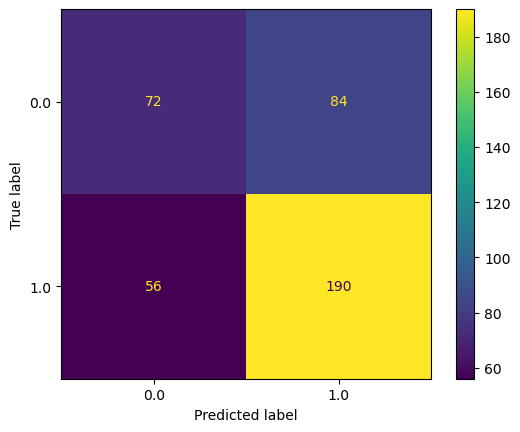

In [25]:
ConfusionMatrixDisplay.from_estimator(
    clf,
    X_test,
    y_test,
    display_labels=clf.classes_,
)

In [26]:
print(190 / (190 + 84))
print(precision_score(y_test, y_pred))

print(190 / (190 + 56))
print(recall_score(y_test, y_pred))

0.6934306569343066
0.6934306569343066
0.7723577235772358
0.7723577235772358


- Uvažuj, že jsi v roli pracovníka agentury, která pomáhá nadějným začínajícím hráčům. Pro tebe jako pro pracovníka agentury je velmi důležité nepropásnout nějaký nový talent. Pokud nabídneš spolupráci někomu, kdo pak neuspěje, tolik to nevadí. Zkus najít hodnotu parametru `n_neighbors`, která maximalizuje ideání metriku pro pracovníka agentury. K nalezení optimální metriky použij graf.

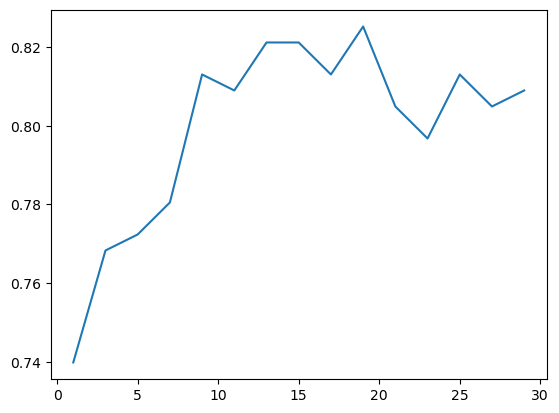

In [27]:
ks = range(1, 31, 2)
recall_scores = []

for k in ks:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    recall_scores.append(recall_score(y_test, y_pred))
plt.plot(ks, recall_scores)

## Bonus

Vrať se k experimentu z lekce, který se zabýval kvalitou vína. 


In [ ]:
data = pandas.read_csv("data/wine.csv")
X = data.drop(columns=["quality"])
y = data["quality"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

clf = KNeighborsClassifier()
clf.fit(X_train, y_train)



Tentokrát vyber hodnotu parametru `n_neighbors` na základě metriky `precision`.

Nejprve se zamysli nad tím, co by nás k tomu vedlo. Která z těchto možností je správná?

1. Je lepší na základě modelu nekoupit dobré víno, než koupit špatné víno a to pak vyhodit.
1. Je lepší koupit omylem špatné víno a to pak vyhodit, než promeškat nákup dobrého víno.


In [ ]:
# Je lepší nekoupit dobré víno, než plýtvat a vyhazovat špatné.

# Proto budeme vybírat na základě metriky PRECISION místo ACCURACY.

# Tato metrika penalizuje označení špatného vína za dobré.
# Kdežto Accuracy určuje poměr správně určených záznamů oproti celku.

Na základě grafu vyber tu hodnotu parametru, která dává nejlepší výsledek (nejvyšší hodnotu při volání `precision_score()`). Liší se tvůj zvolený parametr od parametru, který jsme jako závěrečný zvolili v lekci? 


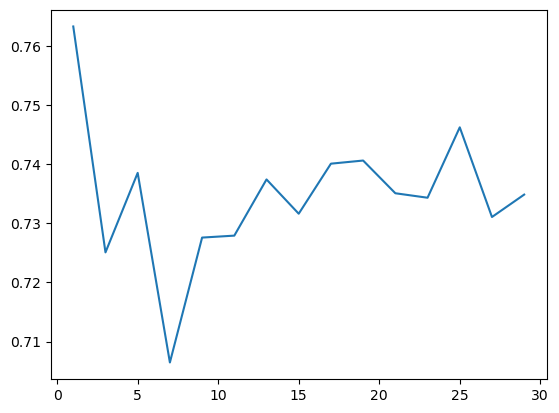

In [33]:
ks = range(1, 31, 2)
precision_scores = []

for k in ks:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    precision_scores.append(precision_score(y_test, y_pred, pos_label="good"))
plt.plot(ks, precision_scores)

Dále vytvoř graf, který bude pro několik parametrů `n_neighbors` obsahovat všechny čtyři výsledné metriky, které jsme si v kurzu ukázali: `accuracy_score`, `precision_score`, `recall_score`, `f1_score`. 

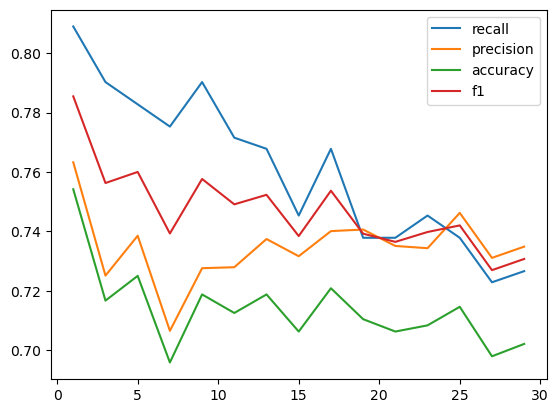

In [34]:
accuracy_scores = []
recall_scores = []
f1_scores = []

for k in ks:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred, pos_label="good"))
    f1_scores.append(f1_score(y_test, y_pred, pos_label="good"))
plt.plot(ks, recall_scores, label="recall")
plt.plot(ks, precision_scores, label="precision")
plt.plot(ks, accuracy_scores, label="accuracy")
plt.plot(ks, f1_scores, label="f1")
plt.legend()